In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
dataset = pd.read_csv(r"C:\Users\alito\Downloads\data.xlsx - Sheet1.csv")
dataset.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [52]:
dataset.shape

(3998, 39)

In [53]:
dataset.isnull().sum().sum()

0

In [54]:
dataset.drop("Unnamed: 0",axis =1,inplace=True)

In [55]:
dataset['CollegeCityTier']=dataset['CollegeCityTier'].astype(object)
dataset['CollegeCityTier']=dataset['CollegeCityTier'].astype(object)

In [56]:
dataset['DOJ'] = dataset['DOJ'].astype('datetime64[ns]')

C:\Users\alito\AppData\Local\Temp\ipykernel_18140\1204041710.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['DOJ'] = dataset['DOJ'].astype('datetime64[ns]')


In [57]:
dataset['DOL'] = dataset['DOL'].replace('present', pd.NaT)

In [58]:
dataset['DOL'] = pd.to_datetime(dataset['DOL'], errors='coerce')

C:\Users\alito\AppData\Local\Temp\ipykernel_18140\432708830.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['DOL'] = pd.to_datetime(dataset['DOL'], errors='coerce')


In [59]:
dataset['DOL'] = dataset['DOL'].astype('datetime64[ns]')

In [60]:
dataset['DOB'] = dataset['DOB'].astype('datetime64[ns]')

C:\Users\alito\AppData\Local\Temp\ipykernel_18140\4084109810.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['DOB'] = dataset['DOB'].astype('datetime64[ns]')


In [61]:
dataset.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    2123 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

# DATA CLEANING

In [63]:
Cities=dataset["JobCity"].unique()
Cities

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [64]:
dataset["JobCity"].value_counts()

JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

In [65]:
dataset.JobCity = dataset.JobCity.str.strip().str.lower()

In [66]:
dataset["JobCity"].unique()

array(['bangalore', 'indore', 'chennai', 'gurgaon', 'manesar',
       'hyderabad', 'banglore', 'noida', 'kolkata', 'pune', '-1',
       'mohali', 'jhansi', 'delhi', 'bhubaneswar', 'navi mumbai',
       'mumbai', 'new delhi', 'mangalore', 'rewari', 'gaziabaad',
       'bhiwadi', 'mysore', 'rajkot', 'greater noida', 'jaipur', 'thane',
       'maharajganj', 'thiruvananthapuram', 'punchkula', 'bhubaneshwar',
       'coimbatore', 'dhanbad', 'lucknow', 'trivandrum', 'gandhi nagar',
       'una', 'daman and diu', 'gurgoan', 'vsakhapttnam', 'nagpur',
       'bhagalpur', 'new delhi - jaisalmer', 'ahmedabad', 'kochi/cochin',
       'bankura', 'bengaluru', 'kanpur', 'vijayawada', 'kochi', 'beawar',
       'alwar', 'siliguri', 'raipur', 'bhopal', 'faridabad', 'jodhpur',
       'udaipur', 'muzaffarpur', 'kolkata`', 'bulandshahar', 'haridwar',
       'raigarh', 'visakhapatnam', 'jabalpur', 'unnao', 'aurangabad',
       'belgaum', 'dehradun', 'rudrapur', 'jamshedpur', 'vizag', 'nouda',
       'dharam

In [67]:
dataset["JobCity"].describe()

count          3998
unique          232
top       bangalore
freq            665
Name: JobCity, dtype: object

In [68]:
city_mapping = {
    'bangalore': 'Bangalore',
 'banglore': 'Bangalore',
 'banagalore': 'Bangalore',
'bengaluru': 'Bangalore',
 'asifabadbanglore':'Bangalore',
 'indore': 'Indore',
 'chennai': 'Chennai',
 'gurgaon': 'Gurgaon',
 'gurgoan': 'Gurgaon',
 'gurga': 'Gurgaon',
 'manesar': 'Manesar',
 'hyderabad': 'Hyderabad',
 'hderabad': 'Hyderabad',
 'hyderabad(bhadurpally)': 'Hyderabad',
 'noida': 'Noida',
 'nouda': 'Noida',
 'kolkata': 'Kolkata',
 'kolkata`': 'Kolkata',
 'pune': 'Pune',
 '-1': 'Unknown',
 'mohali': 'Mohali',
 'jhansi': 'Jhansi',
 'delhi': 'Delhi',
 'new delhi': 'New Delhi',
 'bhubaneswar': 'Bhubaneswar',
 'bhubaneshwar': 'Bhubaneswar',
 'navi mumbai': 'Navi Mumbai',
 'mumbai': 'Mumbai',
 'mangalore': 'Mangalore',
 'rewari': 'Rewari',
 'gaziabaad': 'Ghaziabad',
 'ghaziabad': 'Ghaziabad',
 'bhiwadi': 'Bhiwadi',
 'mysore': 'Mysore',
 'rajkot': 'Rajkot',
 'greater noida': 'Greater Noida',
 'jaipur': 'Jaipur',
 'thane': 'Thane',
 'maharajganj': 'Maharajganj',
 'thiruvananthapuram': 'Thiruvananthapuram',
 'punchkula': 'Panchkula',
 'coimbatore': 'Coimbatore',
 'dhanbad': 'Dhanbad',
 'lucknow': 'Lucknow',
 'trivandrum': 'Thiruvananthapuram',
 'gandhi nagar': 'Gandhinagar',
 'una': 'Una',
 'daman and diu': 'Daman and Diu',
 'vsakhapttnam': 'Visakhapatnam',
 'nagpur': 'Nagpur',
'bhagalpur': 'Bhagalpur',
 'new delhi- jaisalmer': 'New Delhi',
 'ahmedabad': 'Ahmedabad',
 'kochi/cochin': 'Kochi',
 'bankura': 'Bankura',
 'kanpur': 'Kanpur',
 'vijayawada': 'Vijayawada',
 'kochi': 'Kochi',
 'beawar': 'Beawar',
 'alwar': 'Alwar',
 'siliguri': 'Siliguri',
 'raipur': 'Raipur',
 'bhopal': 'Bhopal',
 'faridabad': 'Faridabad',
 'jodhpur': 'Jodhpur',
 'udaipur': 'Udaipur',
 'muzaffarpur': 'Muzaffarpur',
 'bulandshahar': 'Bulandshahar',
 'haridwar': 'Haridwar',
 'raigarh': 'Raigarh',
 'visakhapatnam': 'Visakhapatnam',
 'jabalpur': 'Jabalpur',
 'unnao': 'Unnao',
 'aurangabad': 'Aurangabad',
 'belgaum': 'Belgaum',
 'dehradun': 'Dehradun',
 'rudrapur': 'Rudrapur',
 'jamshedpur': 'Jamshedpur',
 'vizag': 'Visakhapatnam',
 'nouda': 'Noida',
 'dharamshala': 'Dharamshala',
 'hissar': 'Hisar',
 'ranchi': 'Ranchi',
 'madurai': 'Madurai',
 'chandigarh': 'Chandigarh',
 'australia': 'Australia',
 'cheyyar': 'Cheyyar',
 'sonepat': 'Sonepat',
 'pantnagar': 'Pantnagar',
 'jagdalpur': 'Jagdalpur',
 'angul': 'Angul',
 'baroda': 'Vadodara',
 'ariyalur': 'Ariyalur',
 'jowai': 'Jowai',
 'neemrana': 'Neemrana',
 'tirupathi': 'Tirupati',
 'bhubneshwar': 'Bhubaneswar',
'calicut': 'Kozhikode',
 'gandhinagar': 'Gandhinagar',
 'dubai': 'Dubai',
 'ahmednagar': 'Ahmednagar',
 'nashik': 'Nashik',
 'bellary': 'Bellary',
 'ludhiana': 'Ludhiana',
 'muzaffarnagar': 'Muzaffarnagar',
 'gagret': 'Gagret',
 'indirapuram, ghaziabad': 'Ghaziabad',
 'gwalior': 'Gwalior',
 'chennai & mumbai': 'Chennai',
 'rajasthan': 'Rajasthan',
 'sonipat': 'Sonipat',
 'bareli': 'Bareli',
 'hospete': 'Hospete',
 'miryalaguda': 'Miryalaguda',
 'dharuhera': 'Dharuhera',
 'meerut': 'Meerut',
 'ganjam': 'Ganjam',
 'hubli': 'Hubli',
 'ncr': 'NCR',
 'agra': 'Agra',
 'trichy': 'Tiruchirappalli',
 'kudankulam ,tarapur': 'Kudankulam',
 'ongole': 'Ongole',
 'sambalpur': 'Sambalpur',
 'pondicherry': 'Puducherry',
 'bundi': 'Bundi',
 'sadulpur,rajgarh,distt-churu,rajasthan': 'Rajasthan',
 'am': 'Am',
 'bikaner': 'Bikaner',
 'vadodara': 'Vadodara',
 'india': 'India',
 'asansol': 'Asansol',
 'tirunelvelli': 'Tirunelveli',
 'ernakulam': 'Ernakulam',
 'bilaspur': 'Bilaspur',
 'chandrapur': 'Chandrapur',
 'nanded': 'Nanded',
 'dharmapuri': 'Dharmapuri',
 'vandavasi': 'Vandavasi',
 'rohtak': 'Rohtak',
 'patna': 'Patna',
 'salem': 'Salem',
 'nasikcity': 'Nashik',
 'technopark, trivandrum': 'Trivandrum',
'bharuch': 'Bharuch',
 'tornagallu': 'Tornagallu',
 'jaspur': 'Jaspur',
 'burdwan': 'Burdwan',
 'shimla': 'Shimla',
 'gajiabaad': 'Ghaziabad',
 'jammu': 'Jammu',
 'shahdol': 'Shahdol',
 'muvattupuzha': 'Muvattupuzha',
 'al jubail,saudi arabia': 'Al Jubail',
 'kalmar, sweden': 'Kalmar',
 'secunderabad': 'Secunderabad',
 'a-64,sec-64,noida': 'Noida',
 'ratnagiri': 'Ratnagiri',
 'jhajjar': 'Jhajjar',
 'gulbarga': 'Gulbarga',
 'hyderabad(bhadurpally)': 'Hyderabad',
 'nalagarh': 'Nalagarh',
 'jeddah saudi arabia': 'Jeddah',
 'chennai, bangalore': 'Chennai',
 'jamnagar': 'Jamnagar',
 'tirupati': 'Tirupati',
 'gonda': 'Gonda',
 'orissa': 'Odisha',
 'kharagpur': 'Kharagpur',
 'navi mumbai , hyderabad': 'Navi Mumbai',
 'joshimath': 'Joshimath',
 'bathinda': 'Bathinda',
 'johannesburg': 'Johannesburg',
 'kala amb': 'Kala Amb',
 'karnal': 'Karnal',
 'london': 'London',
 'kota': 'Kota',
 'dehraj': 'Dehradun',
 'melbourne': 'Melbourne',
 'moradabad': 'Moradabad',
 'delhi-gurgaon': 'Delhi',
 'ambala': 'Ambala',
 'faridkot': 'Faridkot',
 'rohtak, haryana': 'Rohtak',
 'khammam': 'Khammam',
 'khurda': 'Khurda',
 'jhalawar': 'Jhalawar',
 'kaithal': 'Kaithal',
 'sonbhadra': 'Sonbhadra',
 'fatehgarh sahib': 'Fatehgarh Sahib',
 'kaithal-haryana': 'Kaithal',
'bhilwara': 'Bhilwara',
 'coimbatore, tirupur': 'Coimbatore',
 'sri ganganagar': 'Sri Ganganagar',
 'manipal': 'Manipal',
 'tirupathi': 'Tirupati',
 'kharagpur, west bengal': 'Kharagpur',
 'kolkata': 'Kolkata',
 'trichy-tiruchirappalli': 'Tiruchirappalli'
}

In [69]:
dataset['JobCity'] = dataset['JobCity'].replace(city_mapping)

In [70]:
columns = ['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience']

dataset[columns] = dataset[columns].replace(-1,0)

In [71]:
dataset[columns].describe

<bound method NDFrame.describe of           ID     Salary        DOJ        DOL                  Designation  \
0     203097   420000.0 2012-06-01        NaT      senior quality engineer   
1     579905   500000.0 2013-09-01        NaT            assistant manager   
2     810601   325000.0 2014-06-01        NaT             systems engineer   
3     267447  1100000.0 2011-07-01        NaT     senior software engineer   
4     343523   200000.0 2014-03-01 2015-03-01                          get   
...      ...        ...        ...        ...                          ...   
3993   47916   280000.0 2011-10-01 2012-10-01            software engineer   
3994  752781   100000.0 2013-07-01 2013-07-01             technical writer   
3995  355888   320000.0 2013-07-01        NaT  associate software engineer   
3996  947111   200000.0 2014-07-01 2015-01-01           software developer   
3997  324966   400000.0 2013-02-01        NaT      senior systems engineer   

        JobCity Gender       

In [72]:
dataset["Gender"].value_counts()

Gender
m    3041
f     957
Name: count, dtype: int64

In [74]:
dataset.Salary.mean().round(2)

307699.85

In [75]:
dataset.Salary.min()

35000.0

In [76]:
dataset.Salary.max()

4000000.0

In [77]:
dataset["Salary"].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

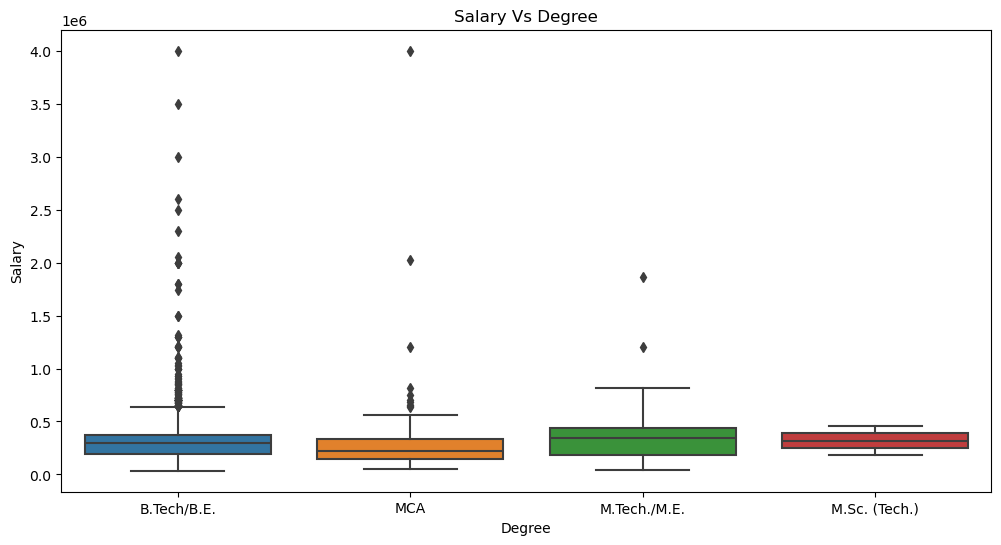

In [79]:
plt.figure(figsize=(12,6))
sns.boxplot(dataset,x="Degree",y="Salary")
plt.title("Salary Vs Degree")
plt.show()

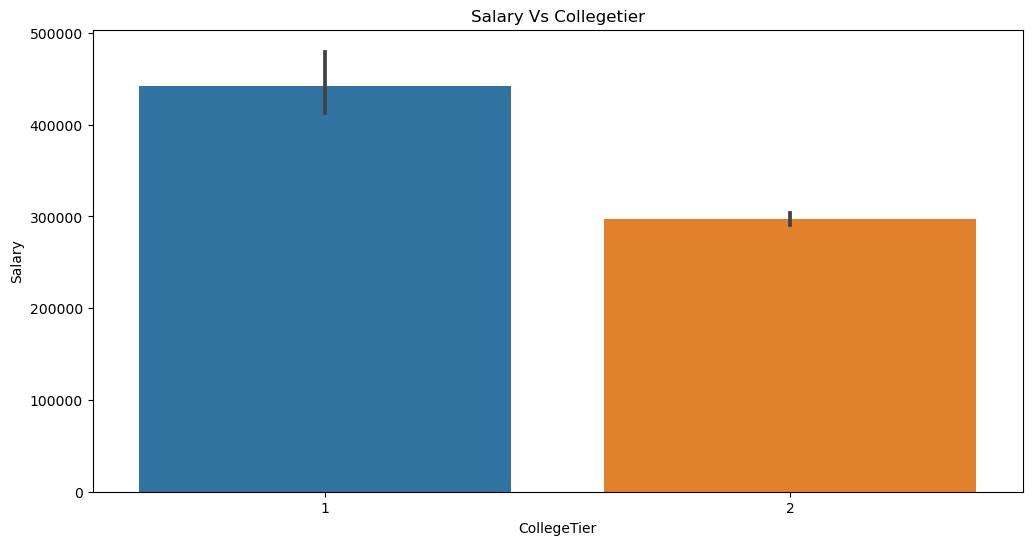

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(dataset,x="CollegeTier",y="Salary")
plt.title("Salary Vs Collegetier")
plt.show()

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Salary'>

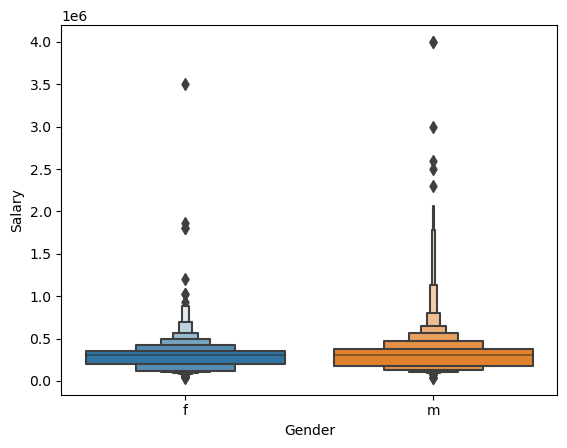

In [81]:
sns.boxenplot(dataset,x='Gender',y='Salary')

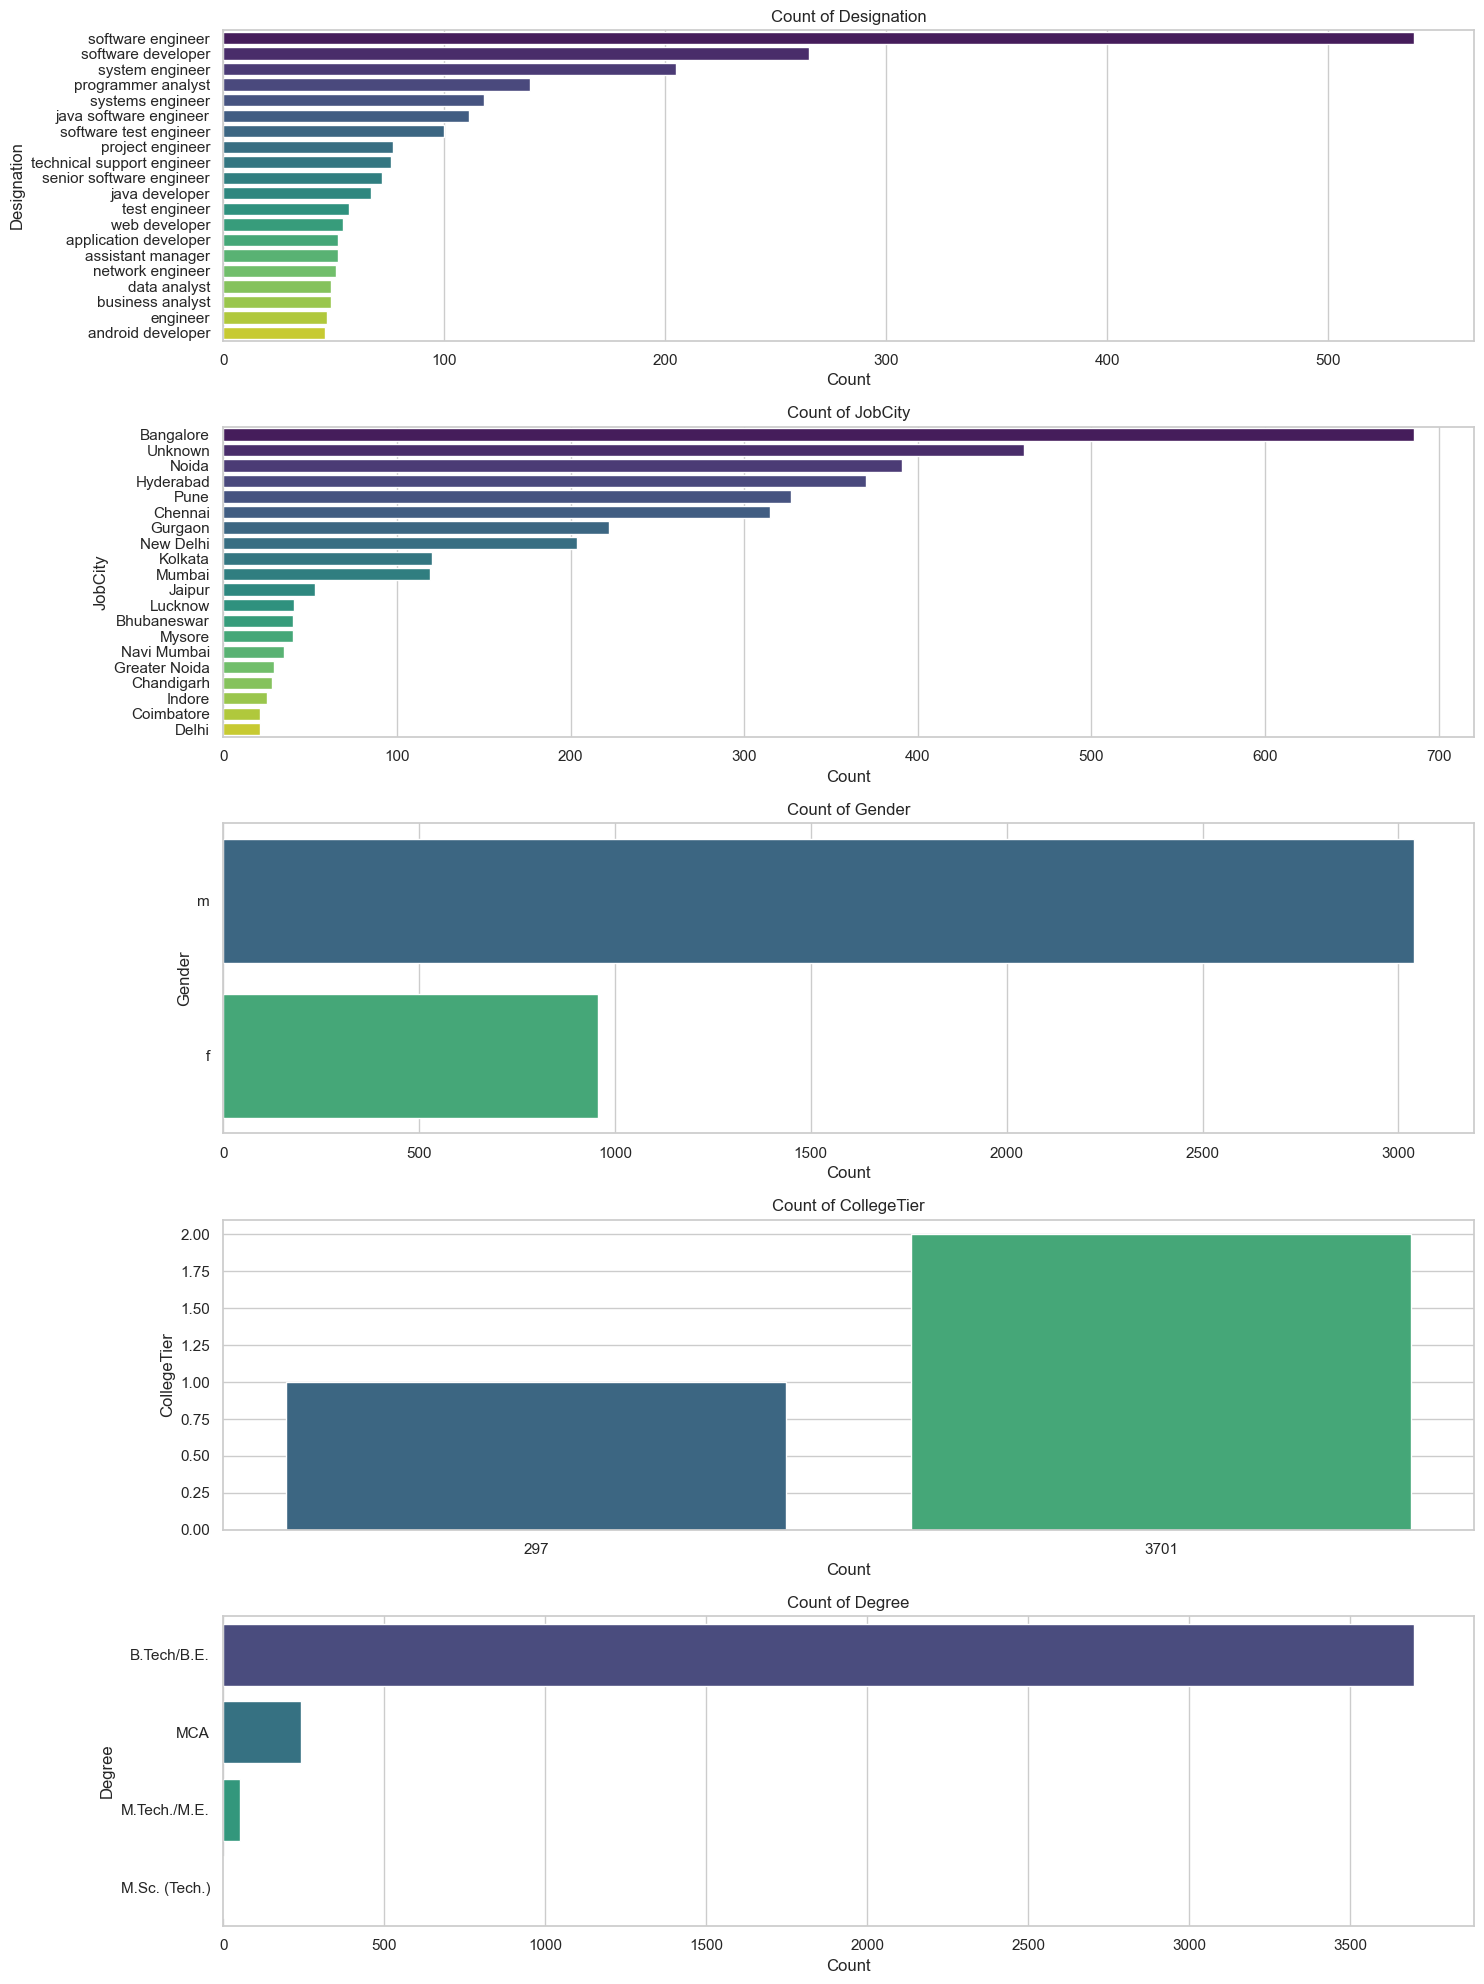

In [82]:
sns.set(style="whitegrid")

# List of important categorical columns
important_categorical_columns = ['Designation', 'JobCity', 'Gender', 'CollegeTier', 'Degree']

# Create a bar plot for each important categorical column
plt.figure(figsize=(15, 20))  # Adjust the figure size as needed
for i, column in enumerate(important_categorical_columns):
    # Create a subplot for each column
    plt.subplot(len(important_categorical_columns), 1, i + 1)  
    
    # Get top 20 values
    top_values = dataset[column].value_counts().nlargest(20)  
    
    # Plot the bar chart with Seaborn
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')  
    
    # Set the title and labels
    plt.title(f'Count of {column}')  
    plt.xlabel('Count')  
    plt.ylabel(column)  

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

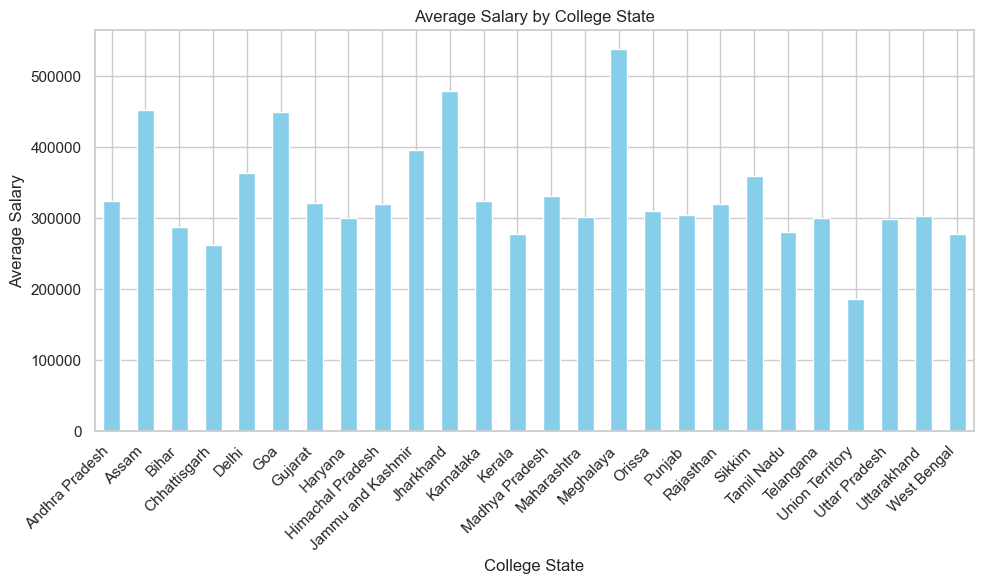

In [83]:
college_salary = dataset.groupby('CollegeState')['Salary'].mean()

plt.figure(figsize=(10,6))
college_salary.plot(kind='bar',stacked=True, color='skyblue')
plt.title('Average Salary by College State')
plt.xlabel('College State')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


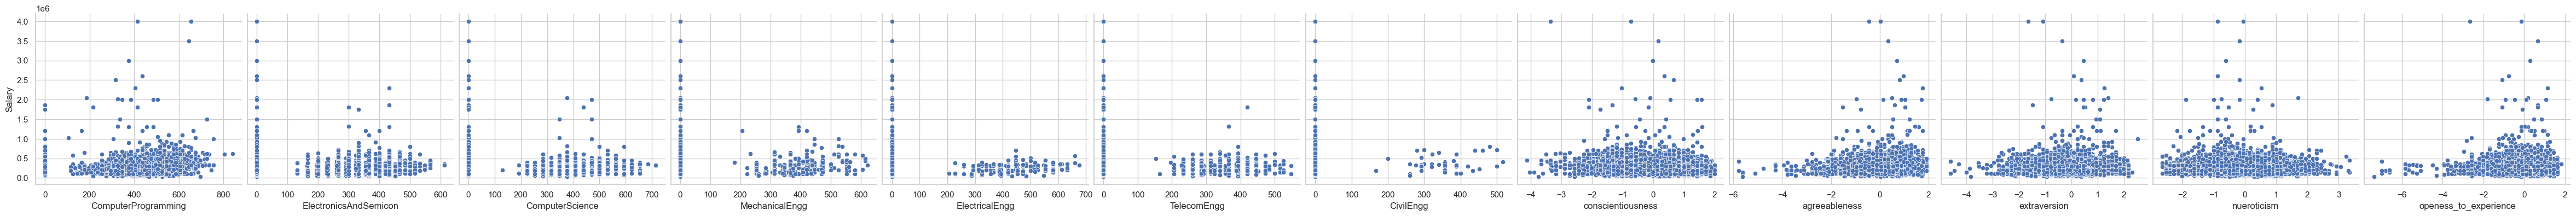

<Figure size 1800x2400 with 0 Axes>

In [88]:
columns=['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg',
         'TelecomEngg', 'CivilEngg', 'conscientiousness','agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

df_clean = dataset.fillna(0,inplace=True)


sns.pairplot(dataset, x_vars=columns, y_vars='Salary', height=4, aspect=1, kind='scatter')

plt.figure(figsize=(18,24))
plt.show()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

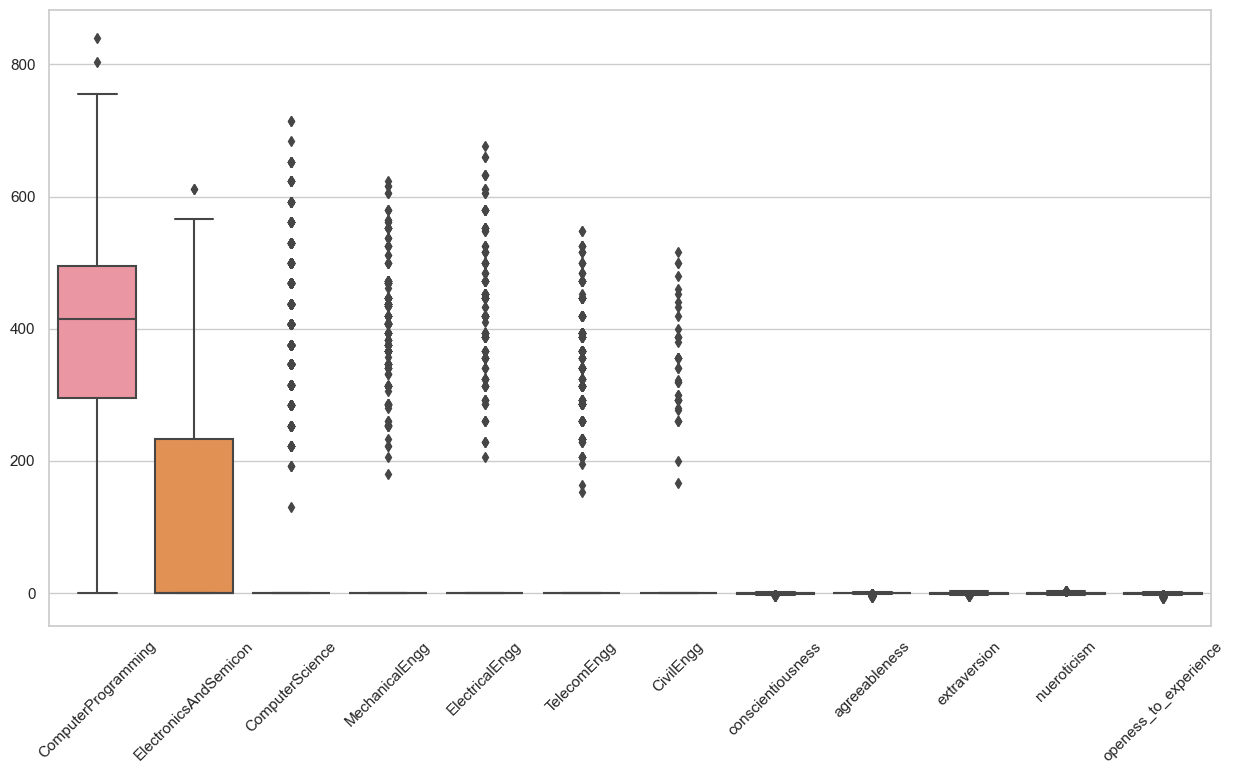

In [90]:
columns=['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg',
         'TelecomEngg', 'CivilEngg', 'conscientiousness','agreeableness', 'extraversion', 'nueroticism','openess_to_experience']

plt.figure(figsize=(15,8))
sns.boxplot(dataset[columns])
plt.xticks(rotation=45)
plt.plot

<Axes: xlabel='count', ylabel='CollegeState'>

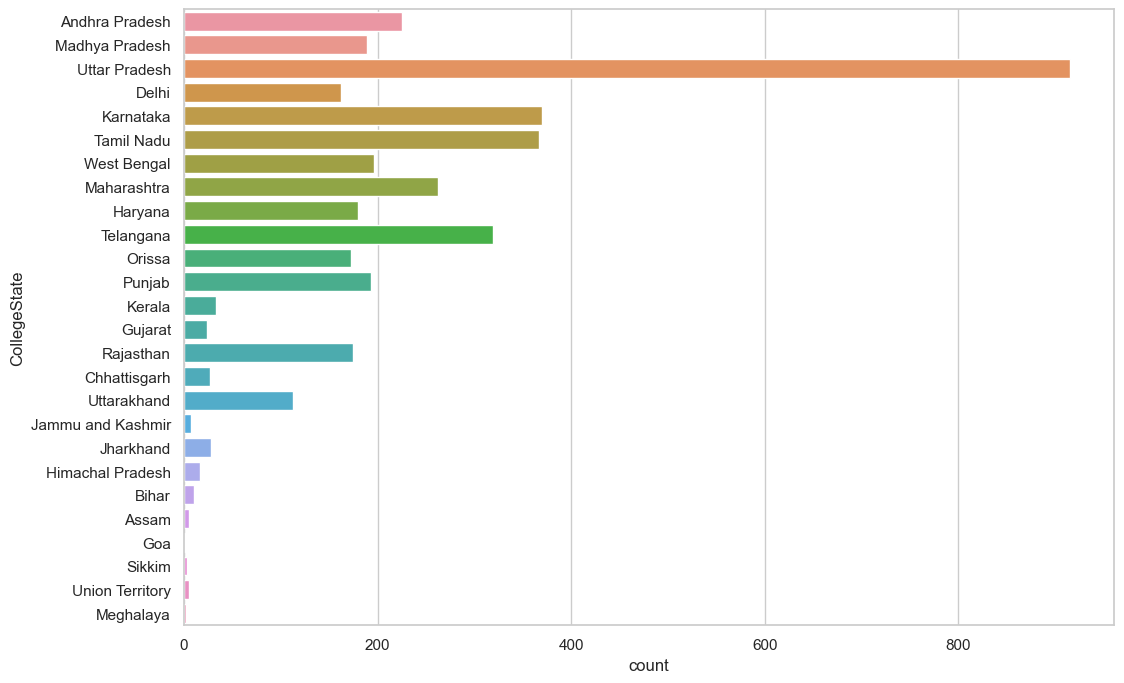

In [93]:
collegestates=dataset["CollegeState"].value_counts().nlargest(20)
plt.figure(figsize=(12,8))
sns.countplot(y="CollegeState",data=dataset)

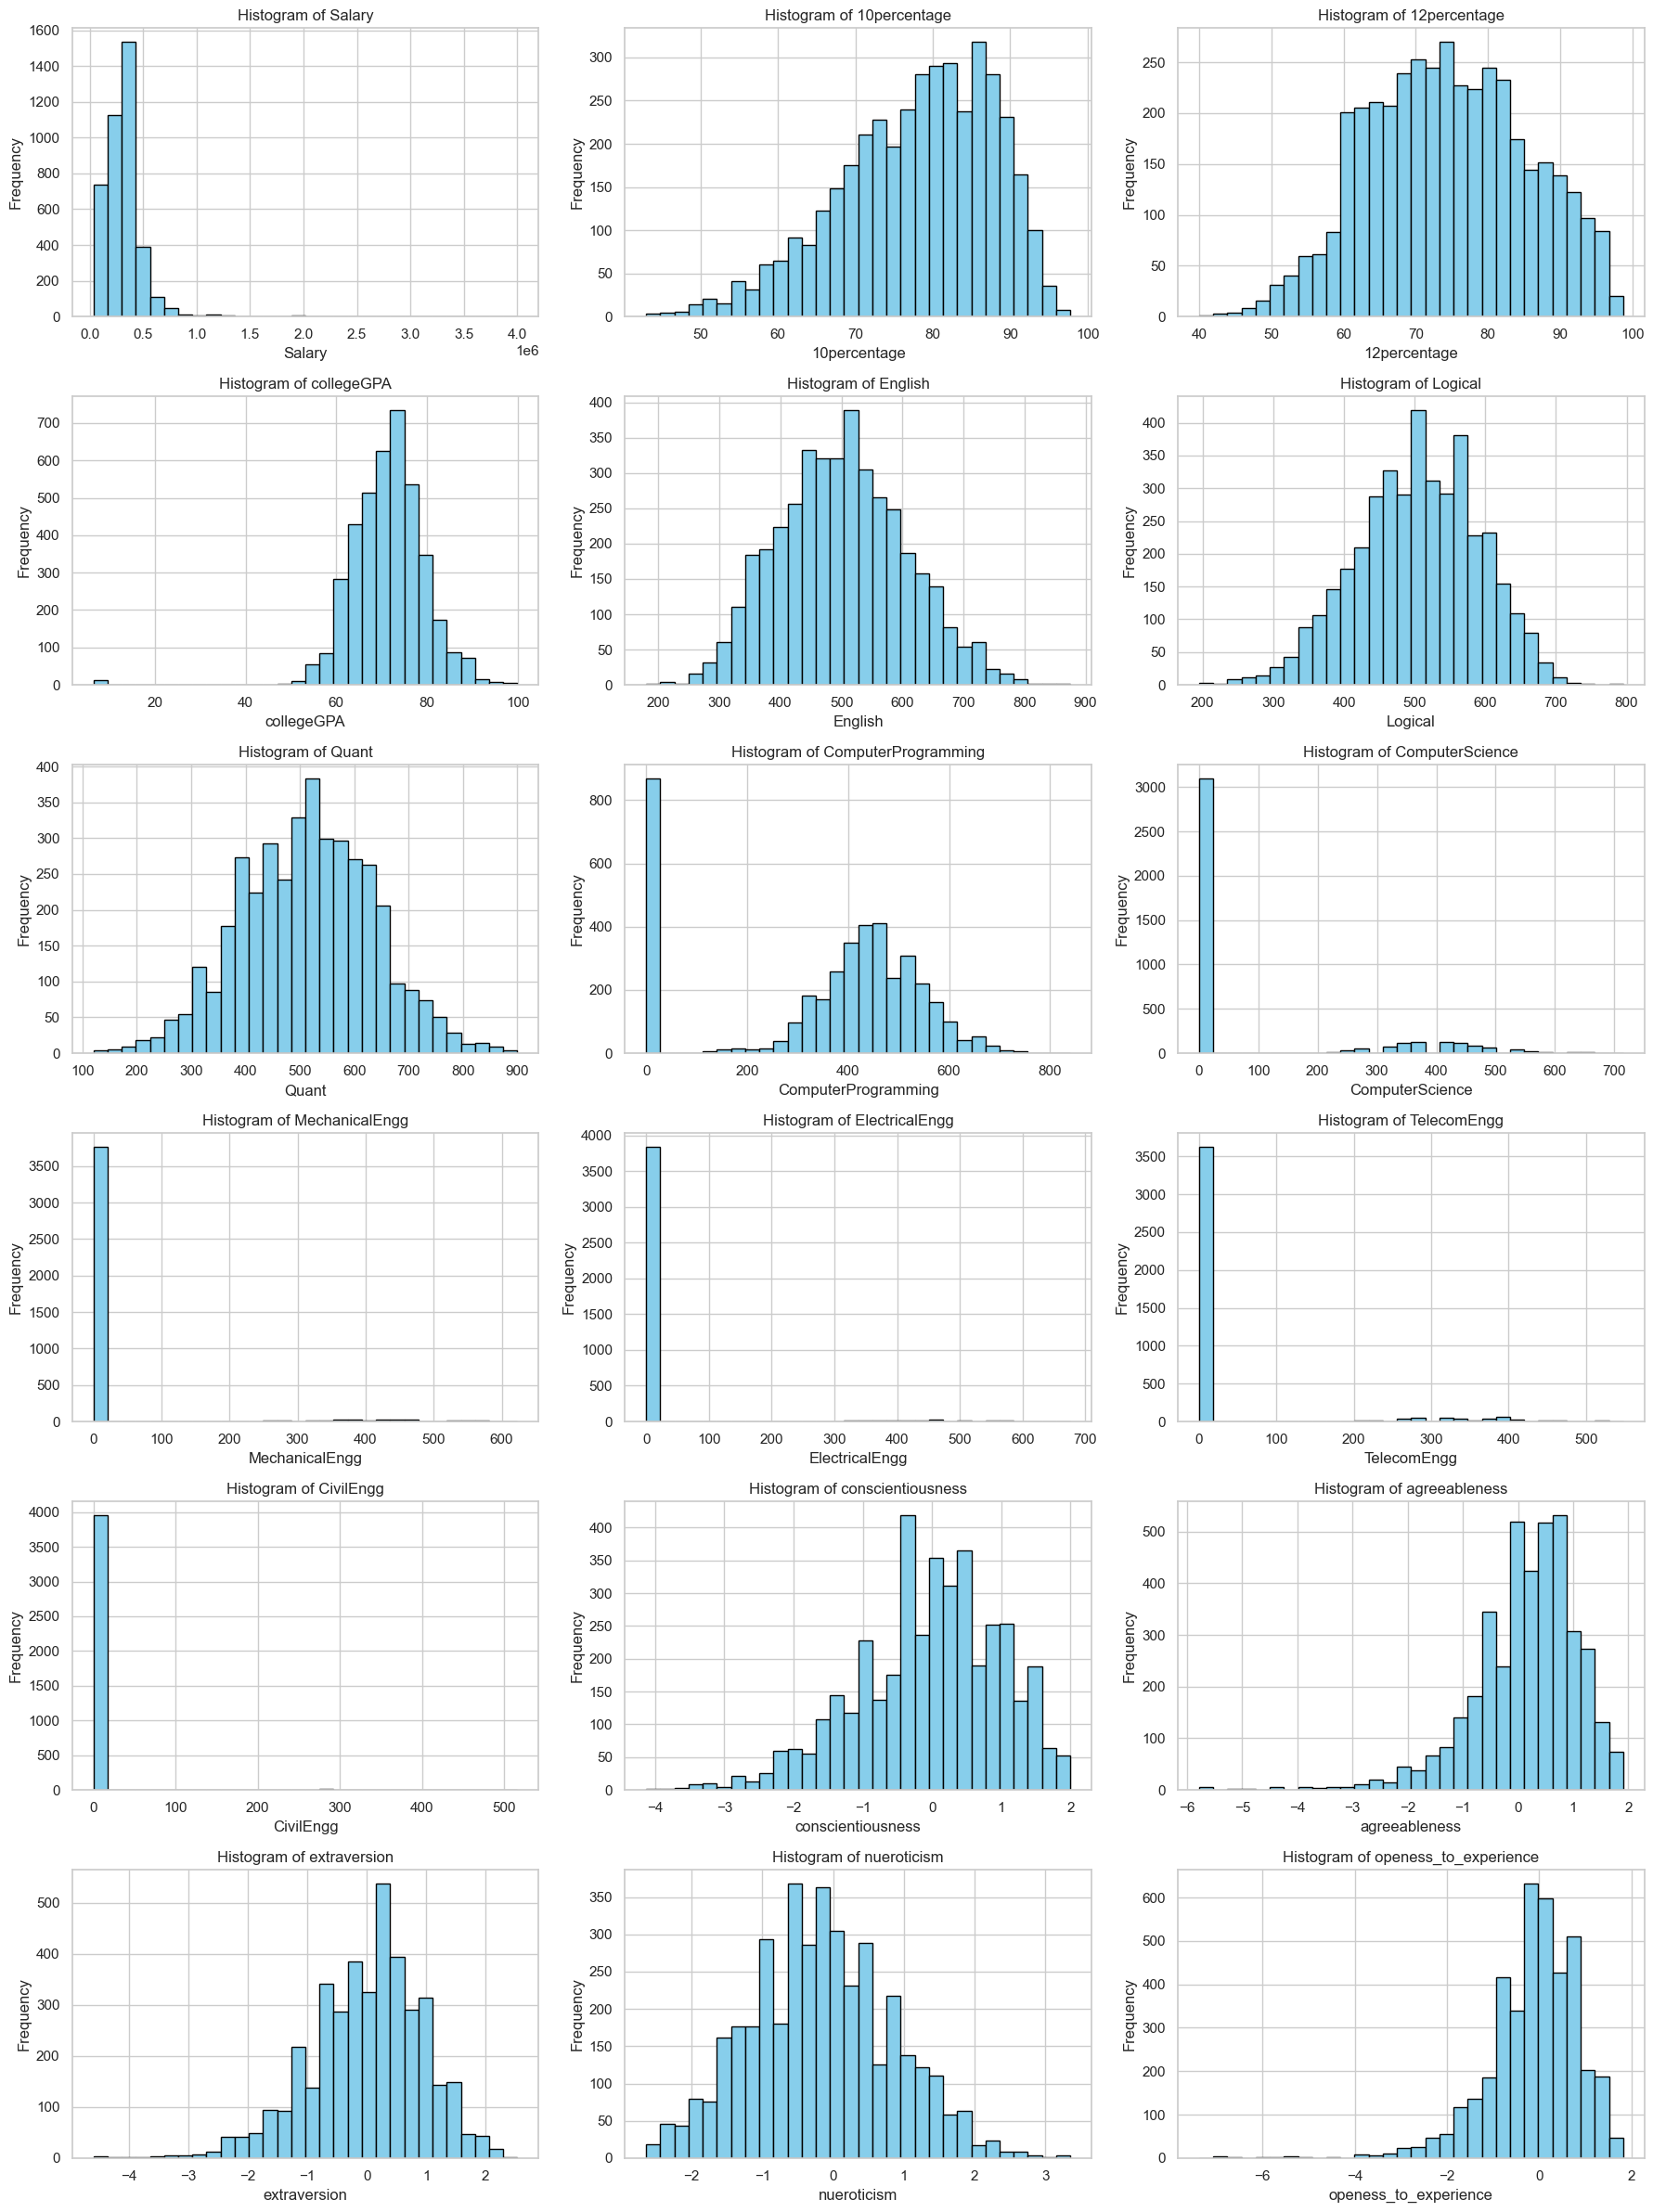

In [96]:
columns_to_plot = [
    'Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
    'Quant', 'ComputerProgramming', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 
    'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 
    'nueroticism', 'openess_to_experience'
]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))  # 6 rows, 3 columns layout
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Loop through each column and its respective axis
for i, column in enumerate(columns_to_plot):
    axes[i].hist(dataset[column].dropna(), bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axes[i].set_title(f'Histogram of {column}')  # Set title for each subplot
    axes[i].set_xlabel(column)  # X-axis label
    axes[i].set_ylabel('Frequency')  # Y-axis label

# Remove any unused subplots (if there are more axes than columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

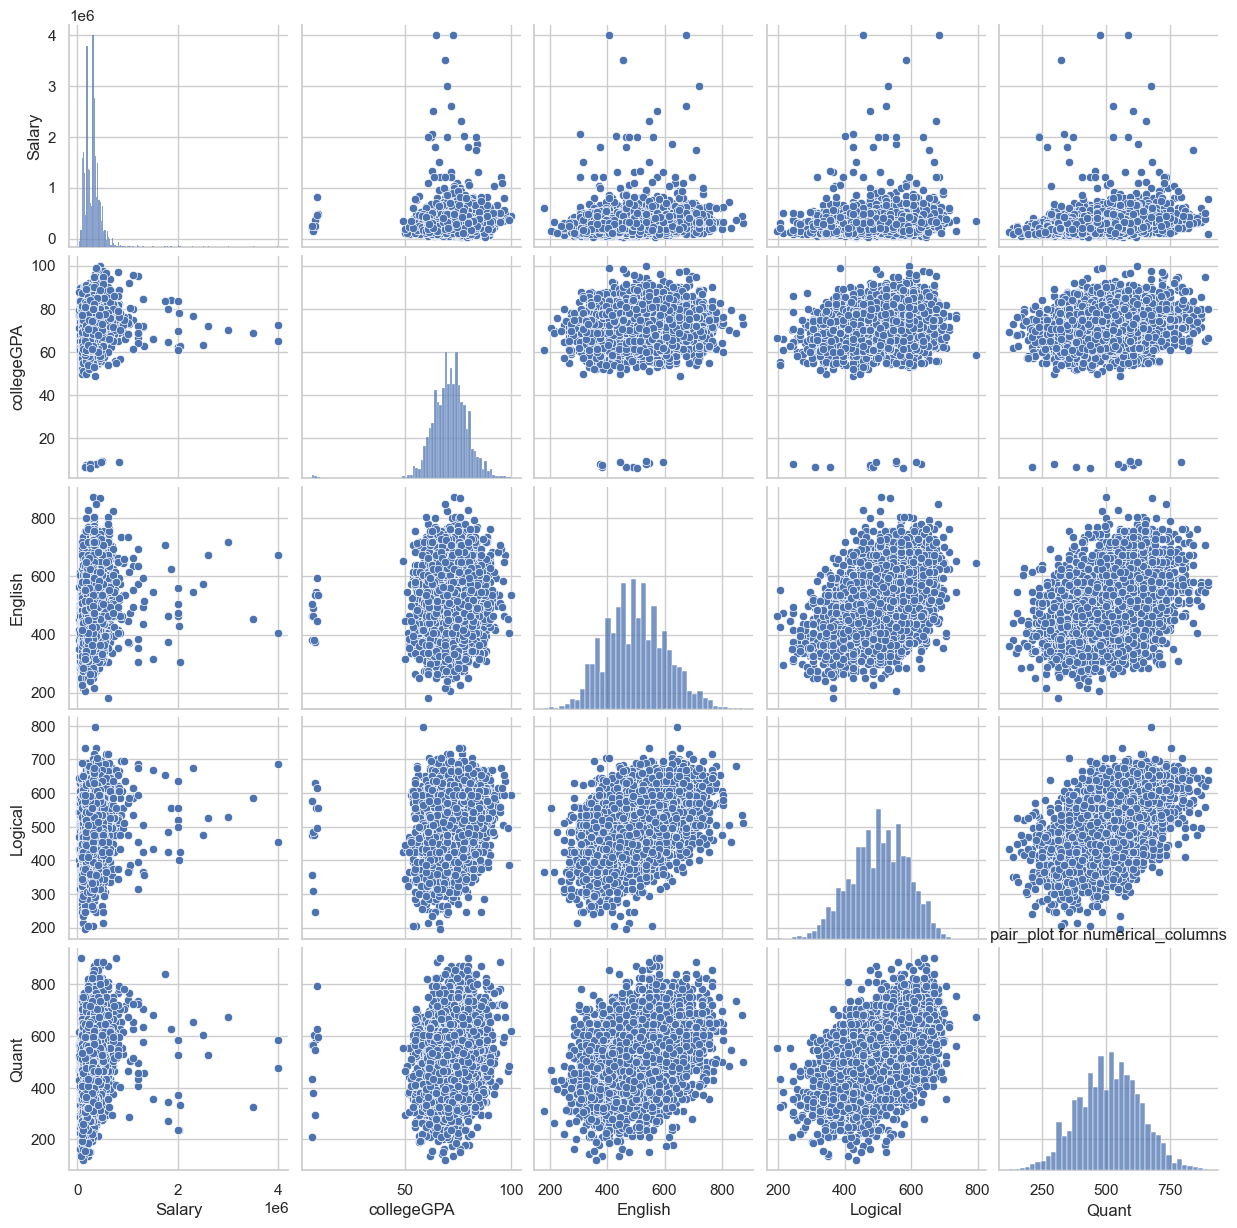

In [97]:
numerical_columns=["Salary","collegeGPA","English","Logical","Quant"]
sns.set(style="whitegrid")
pair_plot=sns.pairplot(dataset[numerical_columns])
plt.title("pair_plot for numerical_columns")
plt.show()

In [94]:
dataset.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [98]:
import numpy as np
from scipy import stats

# Filter data for Computer Science graduates
cs_grads = dataset[dataset['Specialization'] == 'computer science']

# Filter for specific job titles
job_titles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
cs_jobs = cs_grads[cs_grads['Designation'].isin(job_titles)]

# Check the salary range
salary_mean = cs_jobs['Salary'].mean()
salary_median = cs_jobs['Salary'].median()
print(f"Mean Salary: {salary_mean}, Median Salary: {salary_median}")

# Hypothesis Test: One-sample t-test
# H0: The mean salary of Computer Science graduates is 2.75 lakh (within the range of 2.5 to 3 lakh)
# H1: The mean salary of Computer Science graduates is different from 2.75 lakh

t_stat, p_value = stats.ttest_1samp(cs_jobs['Salary'], 275000)

# Check the p-value
if p_value < 0.05:
    print("Reject H0: The average salary is significantly different from 2.75 lakh.")
else:
    print("Fail to reject H0: The average salary is not significantly different from 2.75 lakh.")


Mean Salary: nan, Median Salary: nan
Fail to reject H0: The average salary is not significantly different from 2.75 lakh.


C:\Users\alito\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alito\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [99]:
from scipy.stats import chi2_contingency

# Create a contingency table for Gender and Specialization
contingency_table = pd.crosstab(dataset['Gender'], dataset['Specialization'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check the p-value
if p < 0.05:
    print("Reject H0: There is a significant relationship between Gender and Specialization.")
else:
    print("Fail to reject H0: There is no significant relationship between Gender and Specialization.")


Reject H0: There is a significant relationship between Gender and Specialization.


In [100]:
salary_mean = 275000 
salary_median = 250000
t_stat, p_value = stats.ttest_1samp(cs_jobs['Salary'], 275000)

# For the gender and specialization relationship
chi2, p_gender_spec, dof, expected = chi2_contingency(contingency_table)

# Creating a results DataFrame
results = {
    'Test': ['salary claim', 'gender vs specialization'],
    'Means salary': [salary_mean, np.nan],
    'Median salary': [salary_median, np.nan],
    'T-Statistic': [t_stat, np.nan],
    'P-Value (salary Claim)': [p_value, np.nan],
    'Chi-Squared Statistic': [np.nan, chi2],
    'P-Value (gender-Spec)': [np.nan, p_gender_spec],
    'Conclusion': [
        'Reject H0: The average salary is significantly different from 2.75 lakh.' if p_value < 0.05 else 'Fail to reject H0: The average salary is not significantly different from 2.75 lakh.',
        'Reject H0: There is a significant relationship between Gender and Specialization.' if p_gender_spec < 0.05 else 'Fail to reject H0: There is no significant relationship between Gender and Specialization.'
    ]
}

results_df = pd.DataFrame(results)
results_df.reset_index(drop=True, inplace=True)

# Display the results DataFrame
print(results_df)

                       Test  Means salary  Median salary  T-Statistic  \
0              salary claim      275000.0       250000.0          NaN   
1  gender vs specialization           NaN            NaN          NaN   

   P-Value (salary Claim)  Chi-Squared Statistic  P-Value (gender-Spec)  \
0                     NaN                    NaN                    NaN   
1                     NaN             104.468919               0.000001   

                                          Conclusion  
0  Fail to reject H0: The average salary is not s...  
1  Reject H0: There is a significant relationship...  


C:\Users\alito\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\alito\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
